#Clasificacion Binaria

In [437]:
# se utiliza para el manejo de rutas y directorios.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from matplotlib import pyplot

In [439]:
data = pd.read_csv('C:/Users/OMEN/Documents/7mo Semestre-01-2025/Inteligencia Artificial/Lab-002/metadata_v2.csv')
print(data)

                         original_name image_name dataset double_marked  \
0       Mar22bS1C2R1_VLPAGl_200x_g.TIF      0.png   green     VERDADERO   
1       Mar19bS1C4R1_VLPAGr_200x_g.TIF      1.png   green     VERDADERO   
2          Mar24bS1C1R2_DMr_200x_g.TIF      2.png   green     VERDADERO   
3          Mar19bS1C4R3_LHl_200x_g.TIF      3.png   green     VERDADERO   
4     RT466S5C1R2_ParCortex_100x_g.TIF      4.png   green         FALSO   
...                                ...        ...     ...           ...   
1869    MAR61S1C1R1_LHr_ORX_200x_r.TIF   1938.png     red         FALSO   
1870    MAR61S1C1R1_LHl_ORX_200x_r.TIF   1939.png     red         FALSO   
1871    MAR45S1C1R1_LHr_ORX_200x_r.TIF   1940.png     red         FALSO   
1872                RT368S1C3R2_r2.JPG   1941.png     red         FALSO   
1873    MAR45S1C1R1_LHl_ORX_200x_r.TIF   1942.png     red         FALSO   

       partition marked_structure animal_type animal_id sample_id sample_row  \
0           test   

In [440]:
import pandas as pd
import numpy as np

# Cargar los datos desde el CSV
data = pd.read_csv('C:/Users/OMEN/Documents/7mo Semestre-01-2025/Inteligencia Artificial/Lab-002/metadata_v2.csv')

# Reemplazar 'VERDADERO' y 'FALSO' por 1 y 0 en la columna 'double_marked (doble marcaje)'
data['double_marked'] = data['double_marked'].replace({'VERDADERO': 1, 'FALSO': 0})
#Tipo de marcador fluorescente
data['dataset'] = data['dataset'].replace({'green': 1, 'red': 2, 'yellow': 3})
#entrenamiento o test
data['partition'] = data['partition'].replace({'trainval': 1, 'test': 2 ,'unlabelled':3})

data['marked_structure'] = data['marked_structure'].replace({'nucleus': 2,'citoplasm':1})
data['has_metadata'] = data['has_metadata'].replace({'VERDADERO': 1, 'FALSO': 0})
data['animal_type'] = data['animal_type'].replace({'rat': 0,'marvin':1})
#ata['brain_region'] = data['brain_region'].replace({'VLPAGl': 0,'VLPAGr': 1,'DMr': 2,'LHl': 3,'PARCORTEX': 4,'DMl': 5,'LHr': 6,'LH': 7,'VLPAG': 8,'RVLM': 9,'PARCORT': 10,'MM': 11,'SEPTUM': 12})

data['brain_region'] = data['brain_region'].replace({
    'VLPAGl': 0, 'VLPAGr': 1, 'DMr': 2, 'LHl': 3, 'PARCORTEX': 4,
    'DMl': 5, 'LHr': 6, 'LH': 7, 'VLPAG': 8, 'RVLM': 9, 'PARCORT': 10,
    'MM': 11, 'SEPTUM': 12, 'DM': 13, 'SEPT': 14, 'ARCr': 15, 'ARCl': 16,
    'PVHr': 17, 'unknown': 18, 'DMHl': 19, 'DMHr': 20,'SEPTIM': 21,'PVHl': 22
})

data['zoom'] = data['zoom'].replace({'100x': 1,'200x':2,'250x':3})

# Convertir a NumPy
data_np = data.to_numpy()

# Si deseas usarlo como en tu ejemplo:
X_train = data_np[:900, [2,3, 5,11,12,13, 14]]  # Las columnas 2 (dataset), 5 (marked_structure), 13 (has_metadata)
y_train = data_np[:900, 6]  # La columna 3 (double_marked) es la variable objetivo

X_test = data_np[900:, [2,3, 5,11,12, 13, 14]]  # Las mismas columnas para el conjunto de prueba
y_test = data_np[900:, 6]  #

X=X_train
y=y_train

# Imprimir para ver
print("X:")
print(X)
print("\ny:")
print(y)




X:
[[1 1 2 ... 2 1 3.187]
 [1 1 2 ... 2 1 3.187]
 [1 1 2 ... 2 1 3.187]
 ...
 [3 1 1 ... 2 1 3.187]
 [3 1 1 ... 2 1 3.187]
 [3 1 1 ... 2 1 3.187]]

y:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0

C:\Users\OMEN\AppData\Local\Temp\ipykernel_17672\231941144.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['double_marked'] = data['double_marked'].replace({'VERDADERO': 1, 'FALSO': 0})
C:\Users\OMEN\AppData\Local\Temp\ipykernel_17672\231941144.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['dataset'] = data['dataset'].replace({'green': 1, 'red': 2, 'yellow': 3})
C:\Users\OMEN\AppData\Local\Temp\ipykernel_17672\231941144.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed i

In [441]:
def featureNormalize(X):
    # Asegurarse de que X sea un array de tipo float
    X = np.array(X, dtype=float)
    
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis=0)  # Desviación estándar de las columnas
    
    # Evitar división por cero en caso de que sigma sea cero
    sigma[sigma == 0] = 1

    X_norm = (X - mu) / sigma  # Normalización de los datos
    
    return X_norm, mu, sigma


In [442]:
# Normalizamos X_train
X_norm, mu, sigma = featureNormalize(X)

# Añadir columna de unos para el término de interceptación
m = X_norm.shape[0]
X= np.concatenate([np.ones((m, 1)), X], axis=1)

print(X_norm)

[[-1.23638084  1.31111908  1.38981873 ... -0.75733584  0.
  -1.04547753]
 [-1.23638084  1.31111908  1.38981873 ... -0.75733584  0.
  -1.04547753]
 [-1.23638084  1.31111908  1.38981873 ... -0.75733584  0.
  -1.04547753]
 ...
 [ 2.07535355  1.31111908 -0.71951829 ... -0.75733584  0.
  -1.04547753]
 [ 2.07535355  1.31111908 -0.71951829 ... -0.75733584  0.
  -1.04547753]
 [ 2.07535355  1.31111908 -0.71951829 ... -0.75733584  0.
  -1.04547753]]


In [443]:
def sigmoid(z):
    z = np.array(z, dtype=float)  # asegura que sea array de float
    return 1 / (1 + np.exp(-z))


In [444]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [422]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [2.855587543673744 7.281991791744624 9.892925631386344 1.5521034738471045
 0.08183945467463342 -1.7322975566769512 2.855587543673744
 -5.6707724656879845]
El diagnostico (usando el descenso por el gradiente):1
marvin


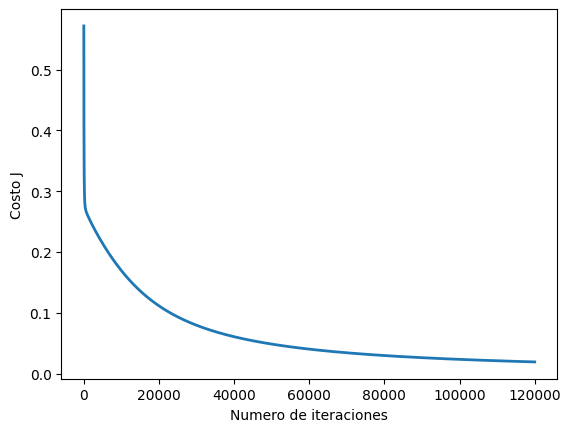

In [445]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 120000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar que tipo de amimal es con los valores de células neuronales observadas con fluorescencia
#X_array = np.array([1, 2, 0,1,1,3,1, 3.9])  
X_array = np.array([1, 1, 2,1,1,3,1, 3.9])  # Convertir a numpy array
diagnostico = sigmoid(np.dot(X_array, theta.T))  # Asegurar la multiplicación correcta


print('El diagnostico (usando el descenso por el gradiente):{:.0f}'.format(diagnostico))
if diagnostico>0.5:
    print("marvin")
else:
    print("rat")


In [446]:
X_test = data_np[900:, [2,3, 5,11, 12,13, 14]]  # Las mismas columnas para el conjunto de prueba
y_test = data_np[900:, 6]  #
print(X_test)
print(theta)

[[3 1 1 ... 2 1 3.187]
 [3 1 1 ... 2 1 3.187]
 [3 1 1 ... 2 1 3.187]
 ...
 [2 0 1 ... 2 1 3.187]
 [2 0 1 ... 3 1 3.991]
 [2 0 1 ... 2 1 3.187]]
[2.855587543673744 7.281991791744624 9.892925631386344 1.5521034738471045
 0.08183945467463342 -1.7322975566769512 2.855587543673744
 -5.6707724656879845]


In [447]:
X_test_norm, mu, sigma = featureNormalize(X_test)
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)
aprueba = sigmoid(np.dot(X_test_norm, theta))   # Se debe cambiar esto
print(aprueba)


[9.99972450e-01 9.99973122e-01 9.99971057e-01 9.99975039e-01
 9.99971762e-01 9.99971057e-01 9.99975039e-01 9.99972450e-01
 9.99971762e-01 9.99971762e-01 9.99972450e-01 9.99971762e-01
 9.99973122e-01 9.99972450e-01 9.99971057e-01 9.99971762e-01
 9.99971057e-01 9.99972450e-01 9.99974416e-01 9.99974416e-01
 9.99972450e-01 9.99975039e-01 9.99975039e-01 9.99973122e-01
 9.99975039e-01 9.99971057e-01 9.99972450e-01 9.99971762e-01
 9.99975039e-01 9.99971762e-01 9.99973122e-01 9.99974416e-01
 9.99973122e-01 9.99973122e-01 9.99974416e-01 9.99973122e-01
 9.99973122e-01 9.99972450e-01 9.99971762e-01 9.99975039e-01
 9.99972450e-01 9.99972450e-01 9.99974416e-01 9.99972450e-01
 9.99973122e-01 9.99975039e-01 9.99974416e-01 9.99974416e-01
 9.99975039e-01 9.99974416e-01 9.99973122e-01 9.99975039e-01
 9.99971057e-01 9.99973122e-01 9.99974416e-01 9.99972450e-01
 9.99973122e-01 9.99975039e-01 9.99973122e-01 9.99971057e-01
 9.99975039e-01 9.99975039e-01 9.99972450e-01 9.99971762e-01
 9.99973122e-01 9.999710

In [426]:
print(X_test_norm)
print(theta)
predict = sigmoid(np.dot(X_test_norm[0], theta))   # Se debe cambiar esto
print(predict)

[[ 1.          0.84932007  0.18726739 ... -0.12076147  0.
  -0.12076147]
 [ 1.          0.84932007  0.18726739 ... -0.12076147  0.
  -0.12076147]
 [ 1.          0.84932007  0.18726739 ... -0.12076147  0.
  -0.12076147]
 ...
 [ 1.         -0.18472712 -5.33995801 ... -0.12076147  0.
  -0.12076147]
 [ 1.         -0.18472712 -5.33995801 ...  8.28078671  0.
   8.28078671]
 [ 1.         -0.18472712 -5.33995801 ... -0.12076147  0.
  -0.12076147]]
[2.855587543673744 7.281991791744624 9.892925631386344 1.5521034738471045
 0.08183945467463342 -1.7322975566769512 2.855587543673744
 -5.6707724656879845]
0.9999724501224816


In [448]:
def predict(theta, X):
    # Aplicamos la función sigmoide y luego convertimos a 0 o 1
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

In [449]:
prob = sigmoid(np.dot([1, 2, 0,1,1,3,1, 3.9], theta))
#verificar que tipo de amimal es con los valores de células neuronales observadas con fluorescencia
print('con ciertos datos datos la probabilidad es  : {:.3f}%'.format(prob))

p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))


con ciertos datos datos la probabilidad es  : 0.004%
Precisión de entrenamiento: 100.00 %
